In [9]:
import numpy as np
import pandas as pd

P = 150000
D = 50000
N = .5 * (np.sqrt(1 + 8*(P/D)) + 1) #.5 not .05 in my calcs
N

3.0

In [16]:
def get_fixed_ratio(P,D):
    qty = .5 * (np.sqrt(1 + 8*(P/D)) + 1)
    return qty 


get_fixed_ratio(150000,50000)

PNL = {'aapl':[150,100],'adbe':[100,100]}
pl = pd.DataFrame.from_dict(PNL)
pl

PNL['aapl'].append(100)

In [26]:
PNL = {'aapl':[]}

p = pd.DataFrame.from_dict(PNL)

PNL['aapl'].append(100)

secs = ['aapl','tsla']

for sec in secs:
    PNL[sec] = []
    
#pnl = {pnl[sec],[] for sec in secs}
PNL['aapl'].append(100)




In [33]:
P = {'aapl':0}

P['aapl'] += 100
P['aapl'] += -50
P['aapl']

50

In [51]:
import pandas_datareader as pdr

BASE_QTY = 1000

aapl = pdr.DataReader('aapl','yahoo','2010')

aapl['MA'] = aapl.Close.rolling(window=15).mean()
aapl['pct_chg'] = aapl['Close'].pct_change()
aapl['Pos'] = np.where(aapl['MA'] < aapl['Close'],1,-1)

aapl['PNL'] = aapl['Pos'] * aapl.pct_chg #* aapl['qty']

aapl['PNL_$'] = (aapl['PNL'] * BASE_QTY*aapl['Close']).cumsum() 

aapl['qty'] = .5 * (np.sqrt(1 + 8*(aapl['PNL_$']/1000)) + 1) 
aapl['PNL_wt'] = aapl['PNL'] * aapl['qty']
aapl['wt_total'] = aapl['PNL_wt'].cumsum()
aapl['reg_total'] = aapl['PNL'].cumsum()
aapl

,High,Low,Open,Close,Volume,Adj Close,MA,pct_chg,Pos,PNL,PNL_$,qty,PNL_wt,wt_total,reg_total
Date,,,,,,,,,,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.681330,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.727465,NaN,0.001729,-1,-0.001729,-5.294783e+01,0.879611,-0.001521,-0.001521,-0.001729
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.302330,NaN,-0.015906,-1,0.015906,4.264461e+02,1.550187,0.024658,0.023137,0.014177
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.253704,NaN,-0.001849,-1,0.001849,4.820567e+02,1.601868,0.002961,0.026098,0.016026
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.428249,NaN,0.006648,-1,-0.006648,2.807263e+02,1.400807,-0.009313,0.016785,0.009378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-29,249.750000,242.570007,248.970001,243.289993,35660100.0,243.289993,238.448666,-0.023128,1,-0.023128,1.382210e+06,53.080131,-1.227633,376.799840,12.828961
2019-10-30,245.300003,241.210007,244.759995,243.259995,30950600.0,243.259995,239.530666,-0.000123,1,-0.000123,1.382180e+06,53.079560,-0.006545,376.793295,12.828838
2019-10-31,249.169998,237.259995,247.240005,248.759995,34766600.0,248.759995,240.775333,0.022610,1,0.022610,1.387804e+06,53.186420,1.202521,377.995817,12.851448


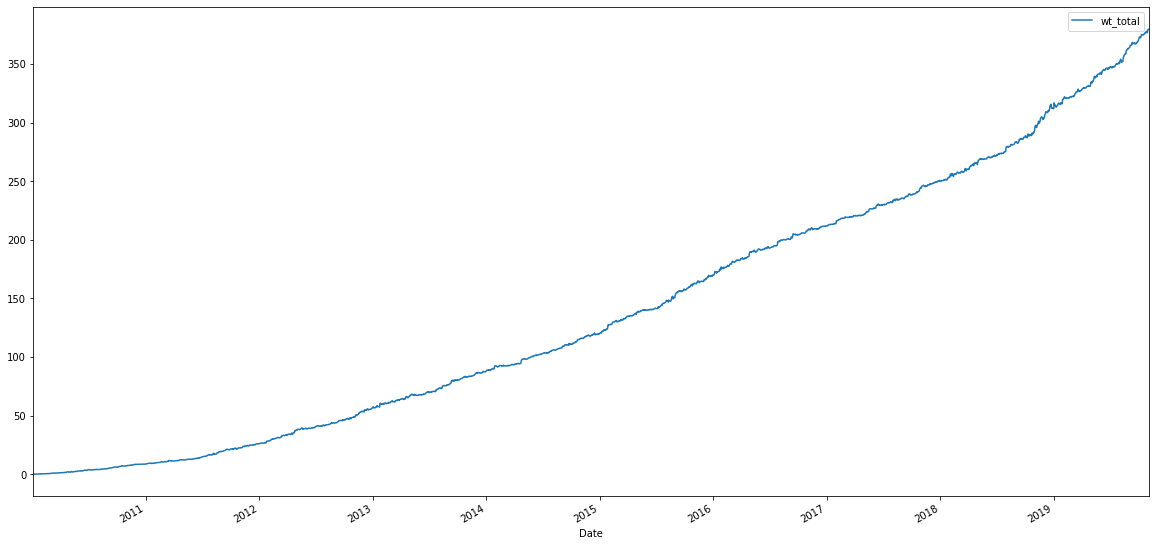

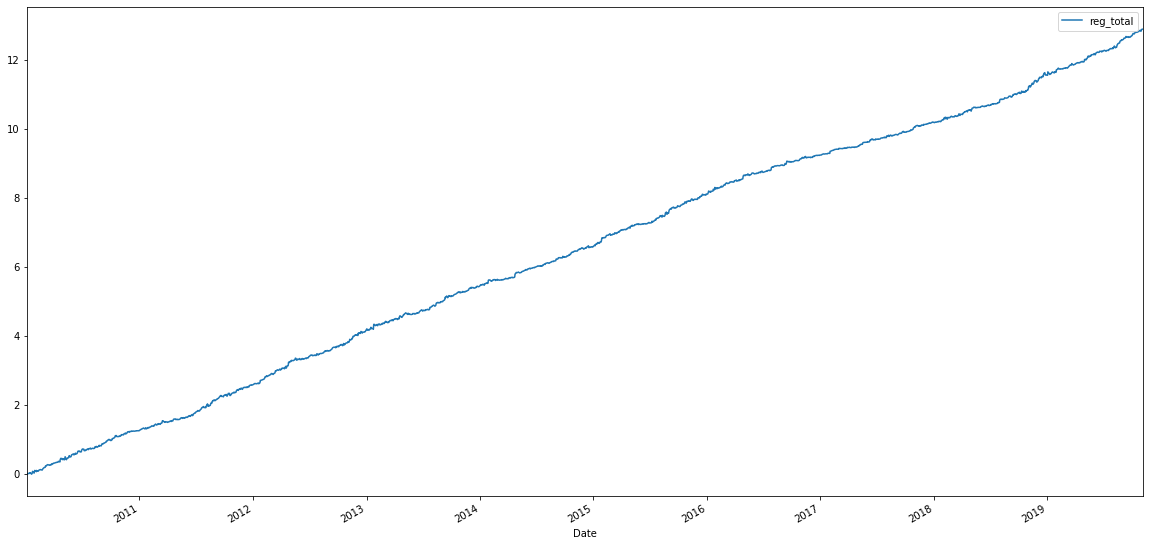

In [58]:
import matplotlib.pyplot as plt

aapl.plot(y='wt_total',figsize=(20,10))
aapl.plot(y='reg_total',figsize=(20,10))
plt.show()

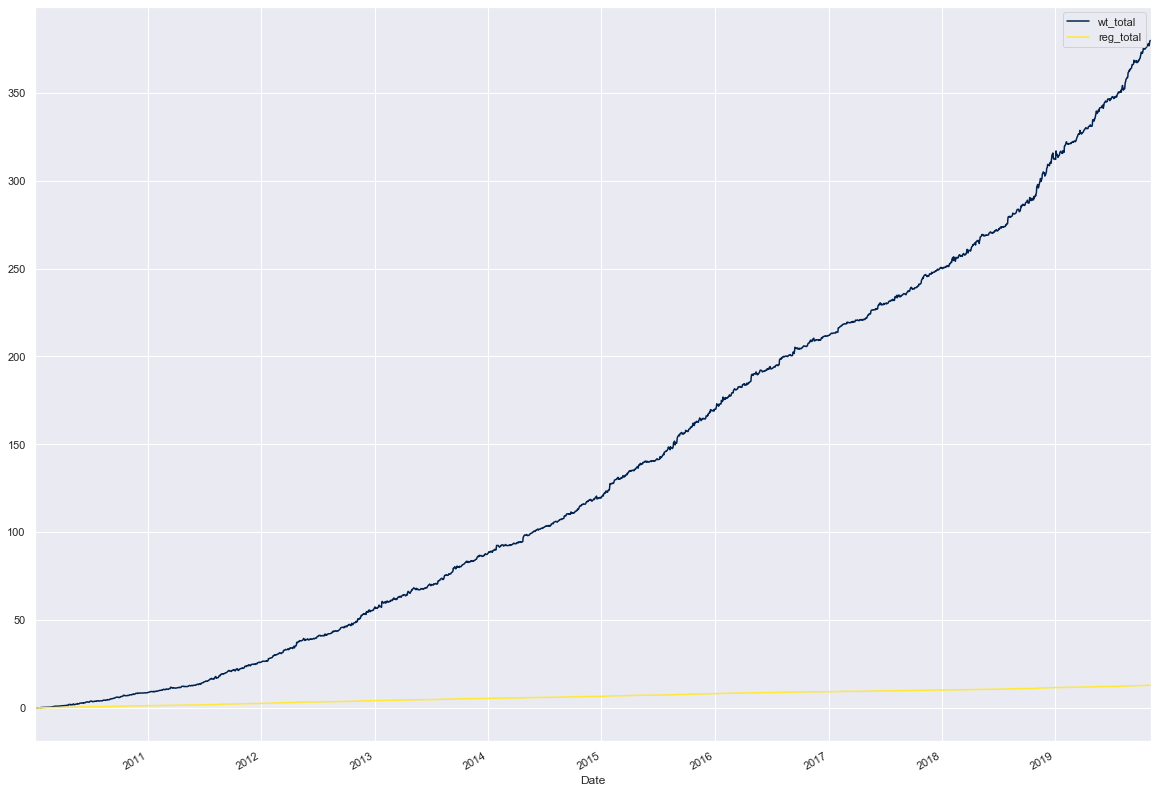

In [96]:
import seaborn as sns

#sns.set()

#aapl.reset_index()


rets = aapl[['wt_total','reg_total']] #NEED DOUBLE BRACKETS BC DF (cant be series )

#sns.lineplot(x='Date',y='wt_total',hue='reg_total',data=aapl)

#just insert as a fucking list!
aapl.plot(x='Date', y=['wt_total', 'reg_total'], figsize=(20,15), grid=True,cmap='cividis')#,secondary_y=['reg_total'])


In [137]:
PNL = {}

secs = ['tsla','aapl','adbe']
eq = 50000
risk = .02
sl = 350

def fixed_fractional(acct_eq,fxd_risk,stop_loss):
    qty = fxd_risk*(acct_eq/stop_loss)
    return qty


def create_PNL_dict(secList):
    for sec in secList:
        PNL[sec] = 0
    return PNL

fixed_fractional(eq,risk,sl)
create_PNL_dict(secs)


'''Psuedo random implementation of live -- '''
for sec in secs:
    for i in range(10): #Repeat 10x
        PNL[sec] += np.random.randint(-1000,100000)
    
PNL

{'tsla': 272727, 'aapl': 521872, 'adbe': 655377}

In [139]:
qty_dict = {} #This is just to test them all, wouldn't actually do this.
for sec in secs:
    qty_dict[sec] = fixed_fractional(PNL[sec],.05,350)
    
qty_dict

{'tsla': 38.961000000000006,
 'aapl': 74.55314285714286,
 'adbe': 93.62528571428572}

In [142]:
'''Kelly Ratio & Kelly Leverage'''


def kelly_lvg(SR,cash_bal):
    '''Returns ratio, and optimal leveraged balance'''
    lvg_ratio = SR**2
    return cash_bal*lvg_ratio, lvg_ratio

bal,ratio = kelly_lvg(5.9,100000) 
print('Yikes! With my (conservative) SR, optimal suggests a {}x Leverage! LTCM style?'.format(ratio))

Yikes! With my (conservative) SR, optimal suggests a 34.81x Leverage! LTCM style?


In [162]:
'''Kelly MM Algo Kelly % = W – (1-W)/R where:'''

wl = .77
wpct = .82
eq = 100000
CLOSE = 150 #Roku ex

def get_Kelly_qty(eq,winPct,wlRatio):
    '''Returns qty for specific strategy/instrument'''
    k_pct = winPct - ((1-winPct)/wlRatio)
    sharesPerEq = eq/CLOSE
    return k_pct * sharesPerEq *.5

print("Kelly Criteria is absurd (even at 1/2)",get_Kelly_qty(eq,wpct,wl))

Kelly Criteria is absurd (even at 1/2) 195.41125541125535


In [198]:
'''Optimal F (always the most absurd)'''

def get_OptF_qty(f,maxLossPct,eq):
    '''Returns QTY given by Optimal F'''
    qty = (f * eq/maxLossPct)/CLOSE
    return qty

get_OptF_qty(.01,.02,100000)

get_OptF_qty(.005,.05,100000) #Maybe set VERY conservatively, it could work?  (like with F = .5%)

66.66666666666667

In [218]:
'''Number_of_units = (Secure_F * Current_Capital / starting_risk_per_unity_of_assets)/Security_Price 
starting risk = maximal loss at trade(in %). Example:
Current Capital - $2,000,000 ($10,000 with margin factor of 200).
Currency Price – 1.2785
Max DrawDown - 20% (value of maximal allowed DrawDown) #Never used?
Secure F - 0.10 (value of maximal allowed DrawDown)
Maximal Loss at trade - 50% 
(0.1 * 2,000,000/0.5)/1.2785 = 312,867/50 = 156,433
'''


'''Secure F -- maybe better? -- MUCH better ! '''

def get_secureF_qty(f,maxDD,maxLoss,eq):
    '''Returns QTY'''
    qty = (f * eq/maxLoss)/CLOSE
    return qty * maxDD*2.5


print('Test: (T)',round(((.1 * 2000000/.5)/1.2785) * .5,0) == 156433)

get_secureF_qty(.01,.04,.02,100000)

Test: (T) True


33.33333333333333

In [289]:
'''Kevin Davey Method -- 2.5x DD'''

#100000/.02
ct = 6500
dd = .02
eq = 100000
realdd = dd*3
extra_usd = 100000*realdd
extra_usd

max_ct = eq/ct #15.38
safe_ct = eq/(ct + dd*eq)
safe_ct+safe_ct*(dd/eq)
max_ct

#round(eq - (dd*eq)*safe_ct,0) == round(safe_ct * ct,0) a definite check to make sure it's right ! 

def get_KDZ_qty(eq,maxDD):
    '''Modified version -- scales DD linearly'''
    max_ct = eq/CLOSE
    ddDlrs = dd*eq
    safe_qty = eq/(CLOSE + ddDlrs)
    assert(round(eq - (dd*eq)*safe_qty,0) == round(safe_qty * CLOSE,0))
    return safe_qty

print(get_KDZ_qty(100000,.02))


#This is too damn much ! unforunately 
def get_KD_qty(eq,maxDD,mult):
    '''Original version'''
    max_ct = eq/CLOSE
    ddUSD = (maxDD * eq) * mult
    safe_qty = (eq-ddUSD)/CLOSE
    assert(round(safe_qty*CLOSE + ddUSD) == round(max_ct*CLOSE))
    return safe_qty

safe_ct * CLOSE 
(dd*eq*3)
(eq - 6000)/CLOSE

print('KD version, unmodded: \n',get_KD_qty(100000,.02,3))


def get_ZO_qty(eq,maxDD,mult,STDev):
    '''Good for init qty possibly'''
    max_ct = eq/CLOSE
    ddStd = maxDD*eq*mult + STDev*eq*mult
    safe_qty = (eq - ddStd)/CLOSE
    return safe_qty

get_ZO_qty(100000,.02,3,.07) * CLOSE

46.51162790697674
KD version, unmodded: 
 626.6666666666666


73000.0